# Unit 4 Homework Assignment: A Whale Off the Port(folio)

![alt](https://utoronto.bootcampcontent.com/utoronto-bootcamp/utor-tor-fin-pt-11-2020-u-c/-/raw/master/Homework/04-Pandas/Instructions/Images/portfolio-analysis.png)

## Data Preparation

### Intial Imports

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

- Whale Returns Cleaning

In [26]:
whale_return = pd.read_csv("whale_returns.csv",index_col="Date", parse_dates=True,infer_datetime_format=True)
whale_return.dropna(inplace=True)
whale_return.sort_index(ascending=True,inplace=True)

- Algo Returns Cleaning

In [27]:
algo_returns = pd.read_csv("algo_returns.csv",index_col="Date", parse_dates=True,infer_datetime_format=True)
algo_returns.dropna(inplace=True)
algo_returns.sort_index(ascending=True,inplace=True)

- SnP500 Cleaning

In [28]:
sp_history = pd.read_csv("sp500_history.csv",index_col="Date", parse_dates=True,infer_datetime_format=True)
sp_history["Close"]= sp_history["Close"].str.replace('$',"")
sp_history["Close"]=sp_history["Close"].astype("float")
sp_dailyreturn = sp_history.pct_change().rename(columns={"Close":"S&P 500"})
sp_dailyreturn.dropna(inplace=True)
sp_dailyreturn.sort_index(ascending=True,inplace=True)

-  Combine Whale, Algorithmic, and S&P 500 Returns

In [29]:
combined_portfolio = pd.concat([whale_return,algo_returns,sp_dailyreturn], join="inner",axis="columns")

## Quantitative Analysis

### Performance Anlysis

- Plotting Daily Returns

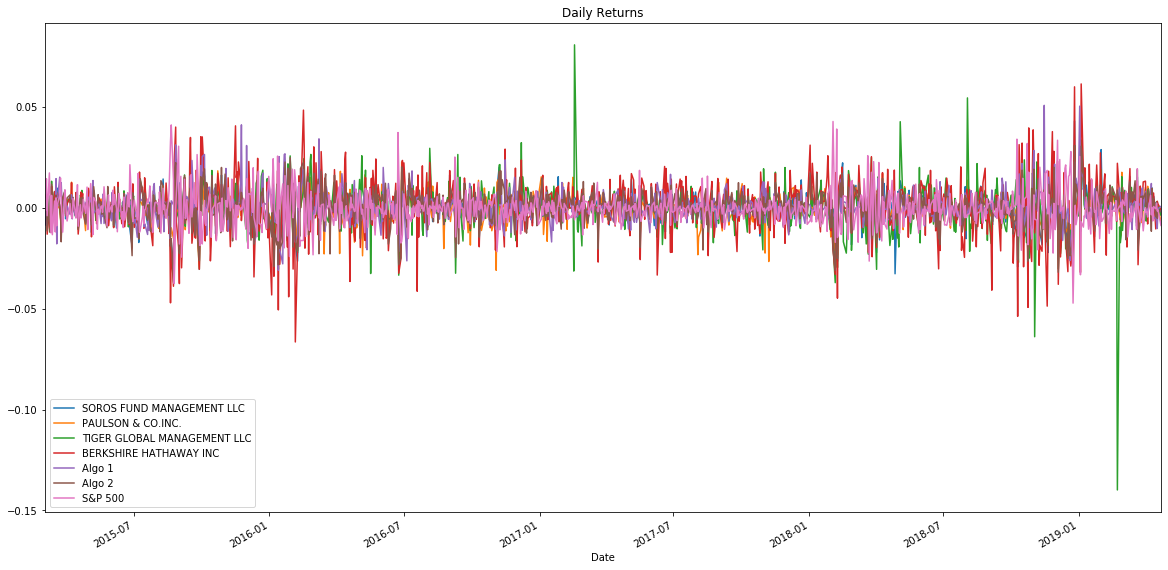

In [30]:
combined_portfolio.plot(figsize=(20,10),title="Daily Returns").margins(x=0)

Based on above graph, we can see that S&P500 is less volatile as compared other portfolios. The most volatile portfolios are Tiger global management
and Berkshire hathaway and they may outperform S&P500 at times, but they can also swing in the downward direction significantly.

- Plotting Cumulative Returns

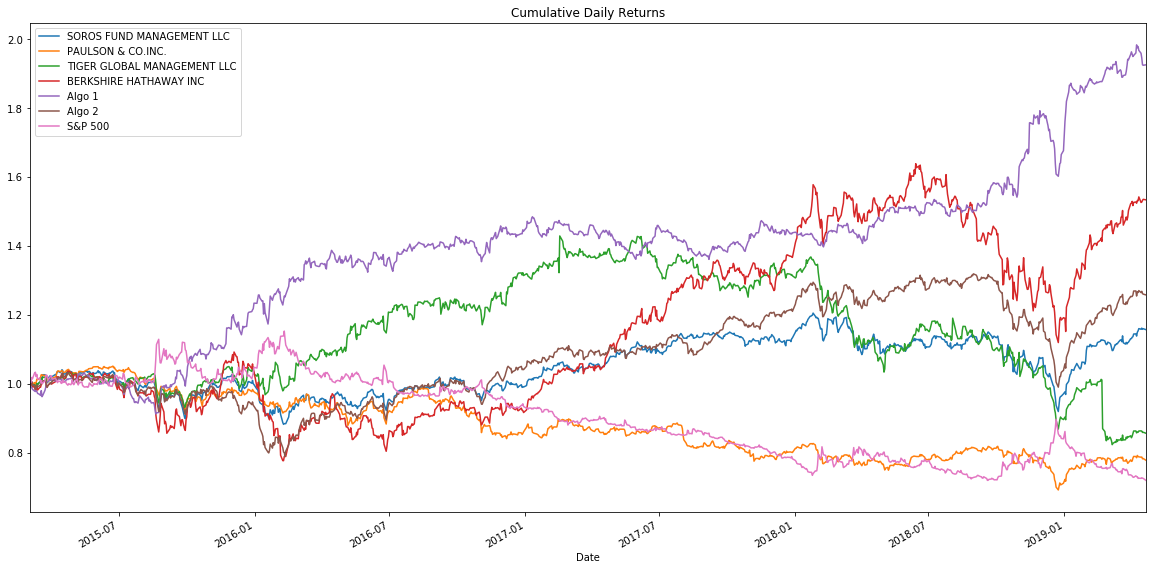

In [31]:
cumulative_return = (1+combined_portfolio).cumprod().plot(figsize=(20,10),title="Cumulative Daily Returns").margins(x=0)

As we can see, over the course of 3 years Algo 1 was the best performing portfolio and Paulson&co was the worst one

### Risk Analysis

- Creating Box Plot

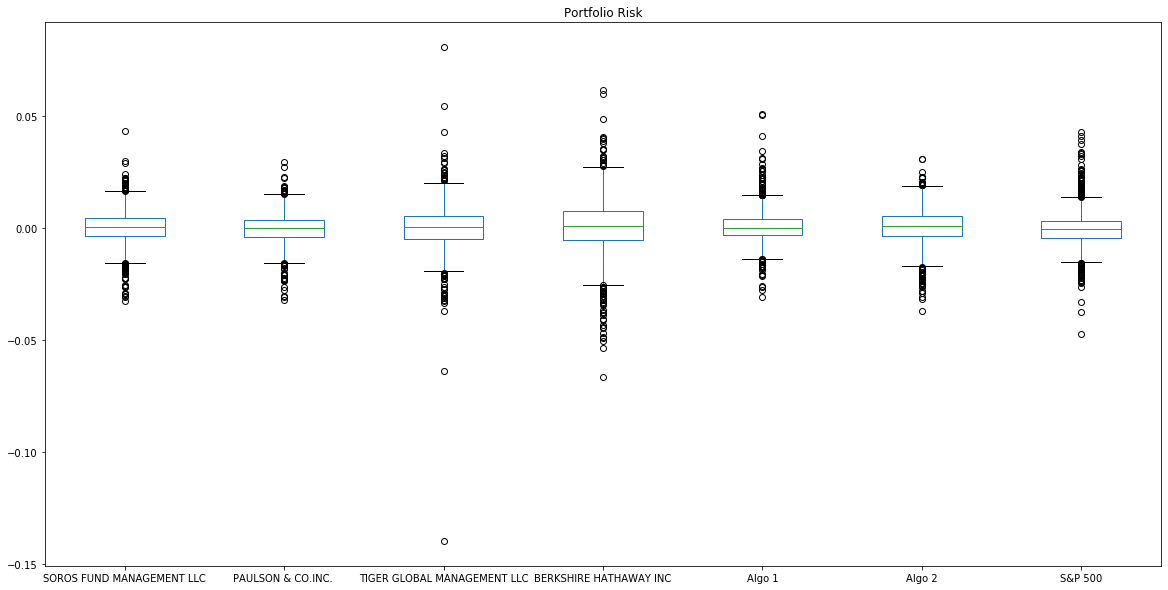

In [32]:
combined_portfolio.plot(kind="box",figsize=(20,10),title="Portfolio Risk")

Based on above, Tiger global management has the greatest outliers, Berkshire Hathaway has the biggest spread and Paulson&Co is the least risker portfolio

- Calculating Standard Deviation

In [33]:
daily_std = pd.DataFrame(combined_portfolio.std()).rename(columns={0:"Standard Deviation"})
daily_std.head(7)

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
S&P 500,0.008587


- Annualized Standard Deviation

In [34]:
annualized_standard_deviation = pd.DataFrame(daily_std*np.sqrt(252)).rename(columns={"Standard Deviation":"Annualized Standard Deviation "})
annualized_standard_deviation.head(7)

,Annualized Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
S&P 500,0.136313


Tiger global management and Berkshire hathaway are going to deviate more as compared to others

###  Rolling Statistics

- 21-Day Rolling Standard Deviations

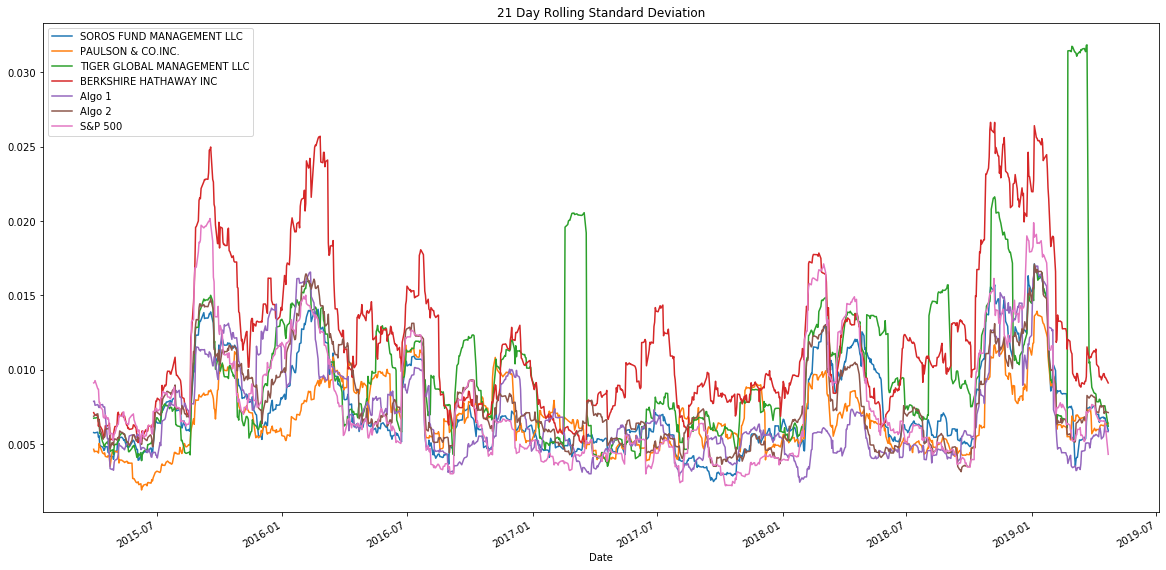

In [35]:
combined_portfolio.rolling(window=21).std().plot(figsize=(20,10),title ="21 Day Rolling Standard Deviation")

As the S&P500 risk increases, all portfolios follow it, however, the magnitudes differ.

- Correlation

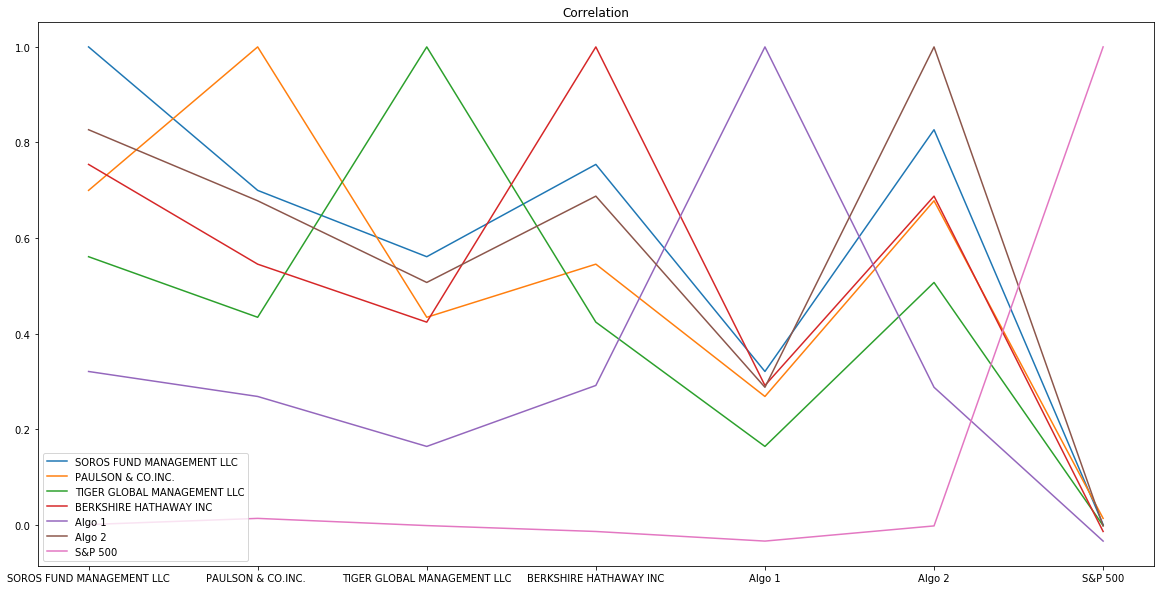

In [36]:
combined_portfolio.corr().plot(figsize=(20,10),title ="Correlation")

In [37]:
correlation = combined_portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


Paulson&co is going to closley resemble S&P500, followed by Soros Fund.

- Plotting Beta for a Algo 1 and the S&P 500

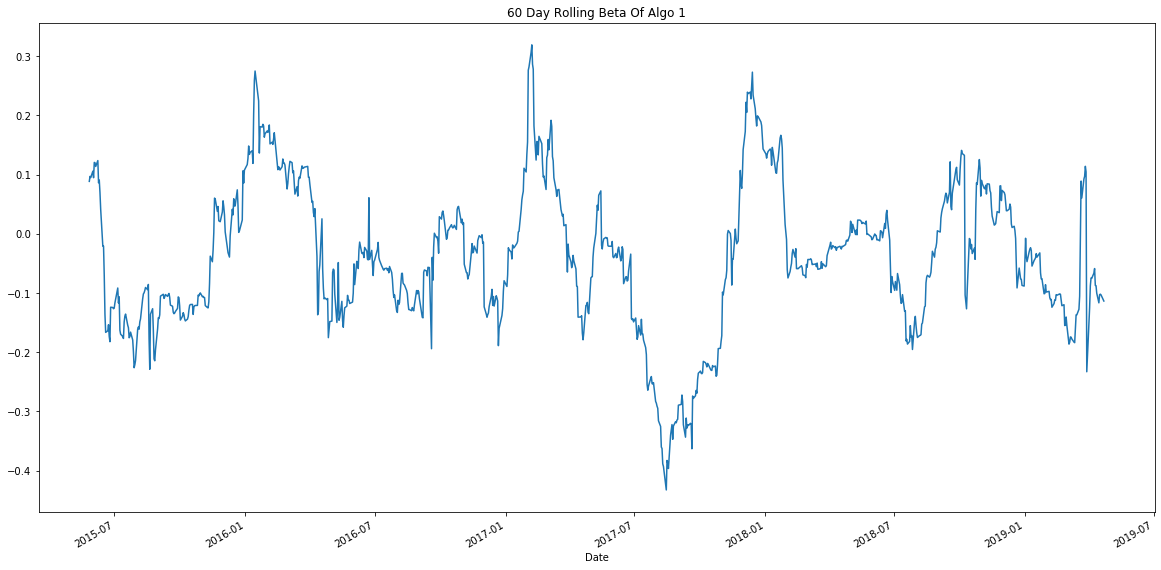

In [38]:
covariance = combined_portfolio["Algo 1"].rolling(window=60).cov(combined_portfolio["S&P 500"])
variance = combined_portfolio["S&P 500"].rolling(window=60).var()
beta = covariance/variance
beta.plot(figsize=(20,10),title ="60 Day Rolling Beta Of Algo 1")

### Exponentially Weighted Average

In [39]:
exponentially_weighted_average = combined_portfolio.ewm(halflife=21)
exponentially_weighted_average

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

###  Sharpe Ratios

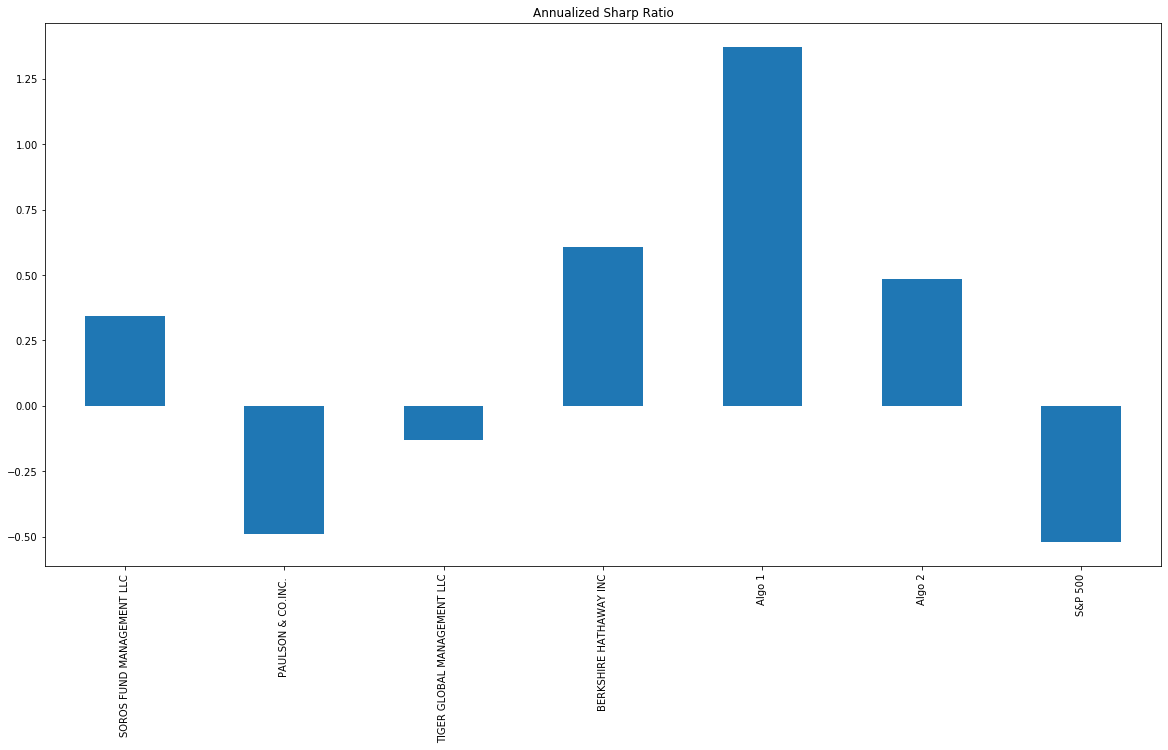

In [40]:
sharp_ratio = (combined_portfolio.mean()*252)/(combined_portfolio.std()*np.sqrt(252))
sharp_ratio.plot(kind="bar",figsize=(20,10),title="Annualized Sharp Ratio")

Apart from Paulson&Co, all of the portfolios outperformed S&P500 and Algo 1 was the top performer.

### Custom Portfolio

#### Data Preperation

- Google

In [42]:
google = pd.read_csv("goog_historical.csv",index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)
google.drop(columns=["Symbol"],inplace=True)
google.sort_index(ascending=True, inplace=True)

- Apple

In [43]:
apple = pd.read_csv("aapl_historical.csv",index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)
apple.drop(columns=["Symbol"],inplace=True)
apple.sort_index(ascending=True, inplace=True)

- Costco

In [44]:
costco = pd.read_csv("cost_historical.csv",index_col="Trade DATE",parse_dates=True,infer_datetime_format=True)
costco.drop(columns=["Symbol"],inplace=True)
costco.sort_index(ascending=True, inplace=True)

- Calculating Returns

In [45]:
apple_return=apple.pct_change()
apple_return["NOCP"]=apple_return.rename(columns={"NOCP":"appledailyreturn"},inplace=True)
apple_return.drop(columns=["NOCP"],inplace=True)
apple_return.dropna(inplace=True)
apple_return.head()

,appledailyreturn
Trade DATE,
2018-05-14,-0.002333
2018-05-15,-0.009088
2018-05-16,0.009333
2018-05-17,-0.006324
2018-05-18,-0.003637


In [46]:
google_return=google.pct_change()
google_return["NOCP"]= google_return.rename(columns={"NOCP":"googledailyreturn"},inplace=True)
google_return.drop(columns=["NOCP"],inplace=True)
google_return.dropna(inplace=True)
google_return.head()

,googledailyreturn
Trade DATE,
2018-05-14,0.001766
2018-05-15,-0.019060
2018-05-16,0.002354
2018-05-17,-0.002940
2018-05-18,-0.011339


In [48]:
costco_return=costco.pct_change()
costco_return["NOCP"]=costco_return.rename(columns={"NOCP":"costcodailyreturn"},inplace=True)
costco_return.drop(columns=["NOCP"],inplace=True)
costco_return.dropna(inplace=True)
costco_return.head()

,costcodailyreturn
Trade DATE,
2018-05-14,0.000613
2018-05-15,-0.002042
2018-05-16,0.016523
2018-05-17,0.004479
2018-05-18,-0.003206


- Combining the portfolio

In [50]:
my_portfolio = pd.concat([apple_return,google_return,costco_return],join="inner",axis="columns")
my_portfolio.head()

,appledailyreturn,googledailyreturn,costcodailyreturn
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


- Assigning Weights

In [51]:
weights = [1/3, 1/3, 1/3]
weighted_returns= my_portfolio.dot(weights)
weighted_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

- Concating my portolio with others

In [52]:
custom_portfolio = pd.concat([combined_portfolio,weighted_returns],join="inner",axis="columns")
custom_portfolio[0]=custom_portfolio.rename(columns={0:"myportfolio"},inplace=True)
custom_portfolio.drop(columns=[0],inplace=True)
custom_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,myportfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


### Analysis

- Annualized Standard Deviation

In [53]:
custom_daily_deviation= custom_portfolio.std()
custom_annualized_deviation= custom_daily_deviation*np.sqrt(252)
custom_annualized_deviation

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
myportfolio                    0.211627
dtype: float64

- Plotting 21 day rolling standard deviation

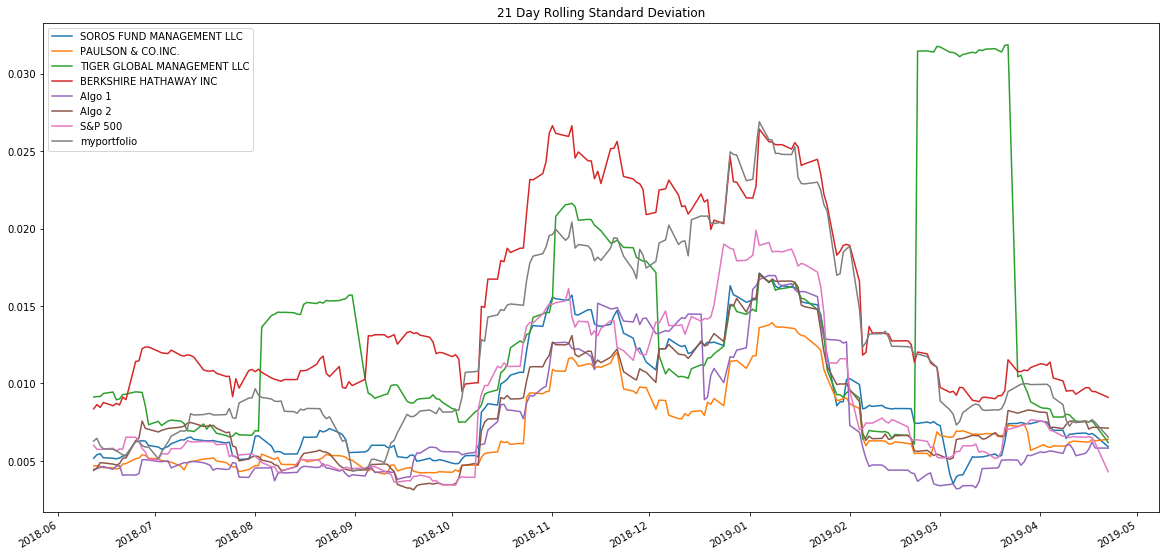

In [55]:
custom_portfolio.rolling(window=21).std().plot(figsize=(20,10),title="21 Day Rolling Standard Deviation")

- Plotting Correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,myportfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
myportfolio,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


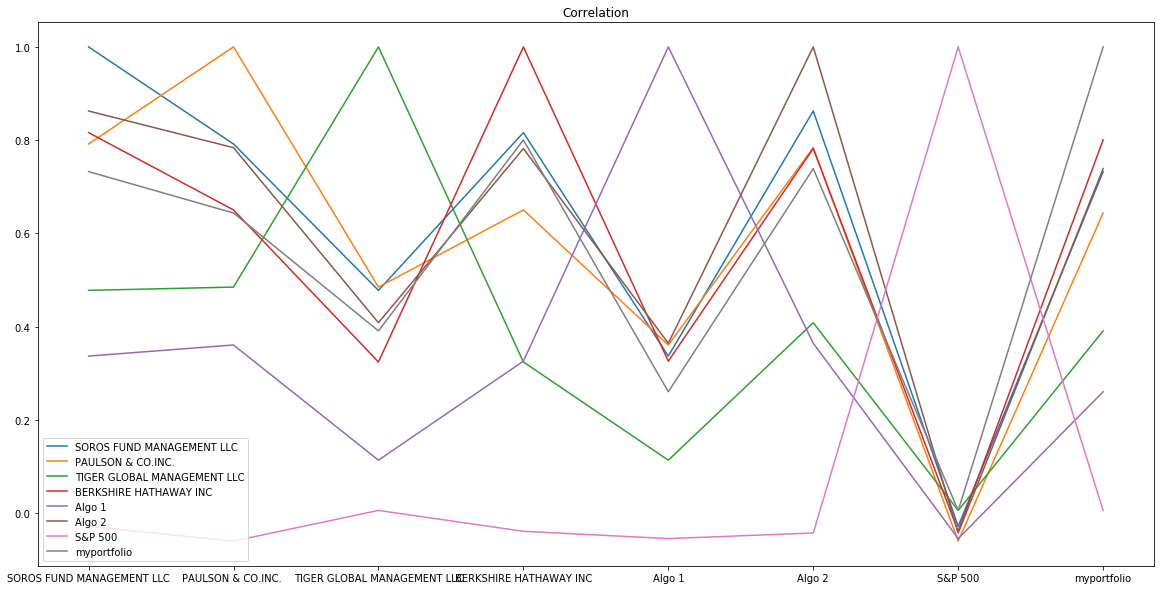

In [61]:
custom_portfolio.corr().plot(figsize=(20,10),title="Correlation")
custom_correlation = custom_portfolio.corr()
custom_correlation

- Calculating Beta

In [58]:
custom_covariance = custom_portfolio["myportfolio"].cov(custom_portfolio["S&P 500"])
custom_variance = custom_portfolio["S&P 500"].var()
custom_beta = custom_covariance/custom_variance
custom_beta

0.007777644779290083

- Sharpe ratio

In [59]:
custom_sharp_ratio = (custom_portfolio.mean()*252)/(custom_portfolio.std()*np.sqrt(252))
custom_sharp_ratio

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
myportfolio                    0.876152
dtype: float64

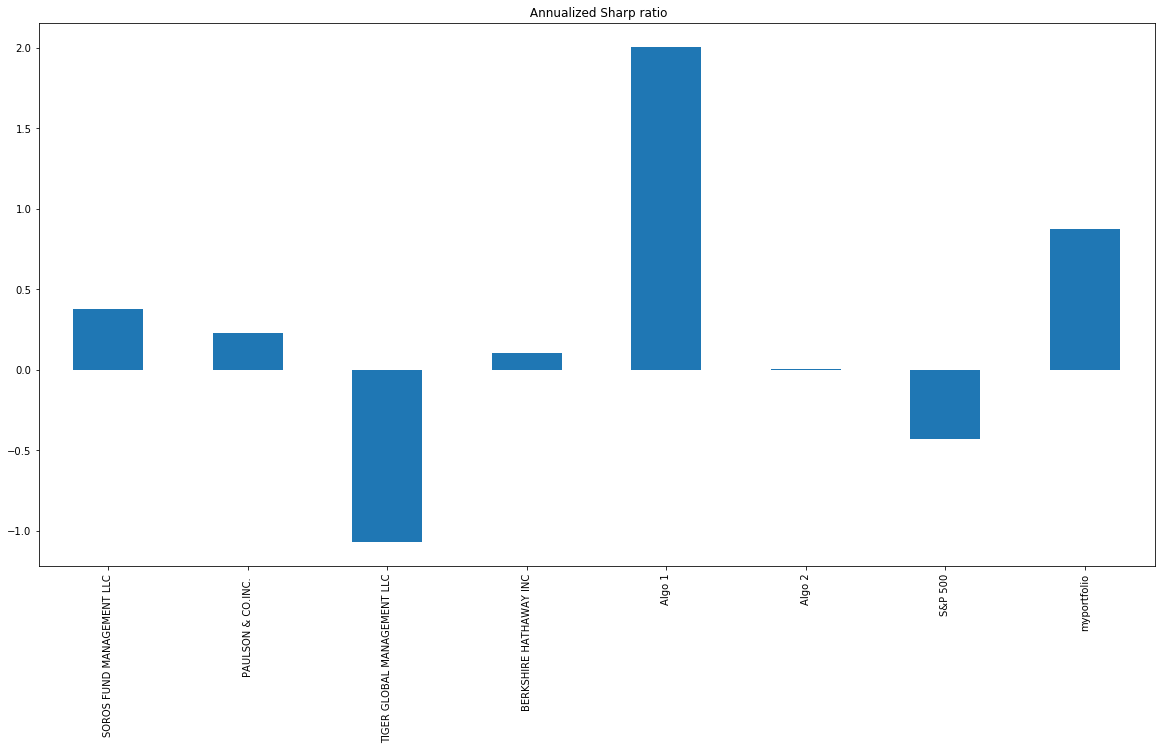

In [60]:
custom_sharp_ratio.plot(kind="bar",figsize=(20,10), title= " Annualized Sharp ratio")

Based on the above analysis, we can see that my portfolio has the 3rd highest deviation and came second in terms of performance.